# Example notebook for DevOpsLab Monitoring using Jupyter
## Using a Database system

These are only examples to show the advantage of having all-in-one for Day-to-day Operations


### 1.Restart the PostgreSQL server and re-create the DEMO database
Because it uses for repeatable demos, so a restart and database re-creation is required

In [21]:
%%bash -x
pg_ctl.exe restart --pgdata="/data"
psql.exe -c "drop database if exists DEMO;" postgres
psql.exe -c "create database DEMO;" postgres

waiting for server to start....
2019-04-28 19:52:33.255 CEST [104] LOG:  listening on IPv4 address "127.0.0.1", port 5432
2019-04-28 19:52:33.354 CEST [104] LOG:  database system is ready to accept connections
 done
server started
DROP DATABASE
CREATE DATABASE


+ pg_ctl.exe restart '--pgdata=C:\Anaconda\pgdata'
pg_ctl: PID file "C:/Anaconda/pgdata/postmaster.pid" does not exist
Is server running?
trying to start server anyway
+ psql.exe -c 'drop database if exists DEMO;' postgres
+ psql.exe -c 'create database DEMO;' postgres


## load the library and connect to DEMO
use `%reload_ext` to avoid the "The sql extension is already loaded." error with `%load_ext`

In [2]:
%reload_ext sql
%sql postgresql://localhost/demo 

'Connected: @demo'

I can see that I run the latest PostgreSQL release:

In [3]:
pg_version=%sql select version()
print(pg_version)

 * postgresql://localhost/demo
1 rows affected.
+------------------------------------------------------------+
|                          version                           |
+------------------------------------------------------------+
| PostgreSQL 11.2, compiled by Visual C++ build 1915, 64-bit |
+------------------------------------------------------------+


## Create a demo table
Many statements can be executed at the same time but all output is displayed at the end

In [4]:
%%sql
drop table if exists EMP;
drop table if exists DEPT;
CREATE TABLE DEPT
       (DEPTNO integer CONSTRAINT PK_DEPT PRIMARY KEY,
        DNAME text ,
        LOC text ) ;
CREATE TABLE EMP
       (EMPNO integer CONSTRAINT PK_EMP PRIMARY KEY,
        ENAME text,
        JOB text,
        MGR integer,
        HIREDATE date,
        SAL integer,
        COMM integer,
        DEPTNO integer CONSTRAINT FK_DEPTNO REFERENCES DEPT);
INSERT INTO DEPT VALUES (10,'ACCOUNTING','NEW YORK');
INSERT INTO DEPT VALUES (20,'RESEARCH','DALLAS');
INSERT INTO DEPT VALUES (30,'SALES','CHICAGO');
INSERT INTO DEPT VALUES (40,'OPERATIONS','BOSTON');
INSERT INTO EMP VALUES (7369,'SMITH','CLERK',7902,to_date('17-12-1980','dd-mm-yyyy'),800,NULL,20);
INSERT INTO EMP VALUES (7499,'ALLEN','SALESMAN',7698,to_date('20-2-1981','dd-mm-yyyy'),1600,300,30);
INSERT INTO EMP VALUES (7521,'WARD','SALESMAN',7698,to_date('22-2-1981','dd-mm-yyyy'),1250,500,30);
INSERT INTO EMP VALUES (7566,'JONES','MANAGER',7839,to_date('2-4-1981','dd-mm-yyyy'),2975,NULL,20);
INSERT INTO EMP VALUES (7654,'MARTIN','SALESMAN',7698,to_date('28-9-1981','dd-mm-yyyy'),1250,1400,30);
INSERT INTO EMP VALUES (7698,'BLAKE','MANAGER',7839,to_date('1-5-1981','dd-mm-yyyy'),2850,NULL,30);
INSERT INTO EMP VALUES (7782,'CLARK','MANAGER',7839,to_date('9-6-1981','dd-mm-yyyy'),2450,NULL,10);
INSERT INTO EMP VALUES (7788,'SCOTT','ANALYST',7566,to_date('13-7-1987','dd-mm-yyyy')-85,3000,NULL,20);
INSERT INTO EMP VALUES (7839,'KING','PRESIDENT',NULL,to_date('17-11-1981','dd-mm-yyyy'),5000,NULL,10);
INSERT INTO EMP VALUES (7844,'TURNER','SALESMAN',7698,to_date('8-9-1981','dd-mm-yyyy'),1500,0,30);
INSERT INTO EMP VALUES (7876,'ADAMS','CLERK',7788,to_date('13-7-1987', 'dd-mm-yyyy')-51,1100,NULL,20);
INSERT INTO EMP VALUES (7900,'JAMES','CLERK',7698,to_date('3-12-1981','dd-mm-yyyy'),950,NULL,30);
INSERT INTO EMP VALUES (7902,'FORD','ANALYST',7566,to_date('3-12-1981','dd-mm-yyyy'),3000,NULL,20);
INSERT INTO EMP VALUES (7934,'MILLER','CLERK',7782,to_date('23-1-1982','dd-mm-yyyy'),1300,NULL,10);

 * postgresql://localhost/demo
Done.
Done.
Done.
Done.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.


[]

## PSQL special commands
Thanks to the PGspecial plug-in, 'backslash' commands can be used

In [5]:
%sql \dt

 * postgresql://localhost/demo
2 rows affected.


Schema,Name,Type,Owner
public,dept,table,Franck
public,emp,table,Franck


## Make a query to retrieve some rows with SQL
Bind variables can be used in the query statements!

In [6]:
deptno=10
%sql select * from DEPT join EMP using (DEPTNO) where deptno=:deptno

 * postgresql://localhost/demo
3 rows affected.


deptno,dname,loc,empno,ename,job,mgr,hiredate,sal,comm
10,ACCOUNTING,NEW YORK,7782,CLARK,MANAGER,7839,1981-06-09,2450,None
10,ACCOUNTING,NEW YORK,7839,KING,PRESIDENT,None,1981-11-17,5000,None
10,ACCOUNTING,NEW YORK,7934,MILLER,CLERK,7782,1982-01-23,1300,None


By default, the output is nicely formated in an HTML table

The previous result is accessible with `_` and can be displayed as an ASCII table

In [7]:
print(_)

+--------+------------+----------+-------+--------+-----------+------+------------+------+------+
| deptno |   dname    |   loc    | empno | ename  |    job    | mgr  |  hiredate  | sal  | comm |
+--------+------------+----------+-------+--------+-----------+------+------------+------+------+
|   10   | ACCOUNTING | NEW YORK |  7782 | CLARK  |  MANAGER  | 7839 | 1981-06-09 | 2450 | None |
|   10   | ACCOUNTING | NEW YORK |  7839 |  KING  | PRESIDENT | None | 1981-11-17 | 5000 | None |
|   10   | ACCOUNTING | NEW YORK |  7934 | MILLER |   CLERK   | 7782 | 1982-01-23 | 1300 | None |
+--------+------------+----------+-------+--------+-----------+------+------------+------+------+


Access to the first row:

In [8]:
print(_[0])

(10, 'ACCOUNTING', 'NEW YORK', 7782, 'CLARK', 'MANAGER', 7839, datetime.date(1981, 6, 9), 2450, None)


Display the column names:

In [9]:
print(_.keys)

['deptno', 'dname', 'loc', 'empno', 'ename', 'job', 'mgr', 'hiredate', 'sal', 'comm']


Access to one column by index or by name:

In [10]:
print(_[0][4])
print(_[0]['hiredate'])

CLARK
1981-06-09


## Graphical displays
Using python mathplotlib library, and some functions like .plot(), .pie(), and .bar(), the Runbook can also shown graphical displays to help us

 * postgresql://localhost/demo
3 rows affected.


<BarContainer object of 3 artists>

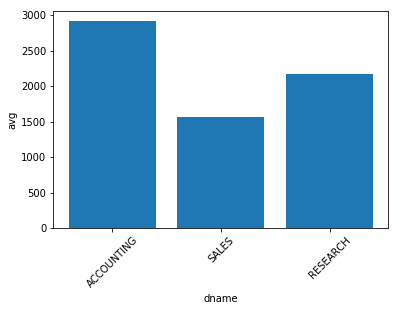

In [20]:
r=%sql select dname,avg(sal) from DEPT join EMP using (DEPTNO) group by dname
%matplotlib inline
r.bar()

### Now it is your turn to use Jupyter for documenting your processes and save time!!!